First we create the model & train it

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Encode categorical variables
label_encoders = {}
for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for later decoding if needed

# Define features and target
X = df.drop(columns=['diabetes'])  # Features
y = df['diabetes']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Then we test our own test user

In [ ]:
# Next we use the model to compute the probability of diabetes of a new user

# Define new user input (example data)
new_user = {
    "gender": "Female",
    "age": 80.0,
    "hypertension": 0,
    "heart_disease": 0,
    "smoking_history": "never",
    "bmi": 48.5,
    "HbA1c_level": 5.9,
    "blood_glucose_level": 220
}

# Convert categorical variables using the same encoding as before
new_user["gender"] = label_encoders["gender"].transform([new_user["gender"]])[0]
new_user["smoking_history"] = label_encoders["smoking_history"].transform([new_user["smoking_history"]])[0]

# Convert dictionary to DataFrame for consistency
new_user_df = pd.DataFrame([new_user])

# Scale numerical features using the same scaler as before
new_user_scaled = scaler.transform(new_user_df)

# Make a prediction
new_prediction = model.predict(new_user_scaled)[0]
new_probability = model.predict_proba(new_user_scaled)[0][1]  # Probability of diabetes

# Print the result
print(f"Predicted Diabetes Status: {'Diabetic' if new_prediction == 1 else 'Non-Diabetic'}")
print(f"Probability of Having Diabetes: {new_probability:.2f}")


In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [31]:
data = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [32]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 
# Load dataset
df = data
 
 # Encode categorical variables
label_encoders = {}
for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for later decoding if needed

# Define features and target
X = df.drop(columns=['diabetes'])  # Features
y = df['diabetes']  # Target
 
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
 # Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
 
 # Make predictions
y_pred = model.predict(X_test)

 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
[[18127   165]
 [  661  1047]]


In [35]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


Correlation Matrix:
                       gender       age  hypertension  heart_disease  \
gender               1.000000 -0.030656      0.014203       0.077696   
age                 -0.030656  1.000000      0.251171       0.233354   
hypertension         0.014203  0.251171      1.000000       0.121262   
heart_disease        0.077696  0.233354      0.121262       1.000000   
smoking_history     -0.077919  0.228608      0.093177       0.027598   
bmi                 -0.022994  0.337396      0.147666       0.061198   
HbA1c_level          0.019957  0.101354      0.080939       0.067589   
blood_glucose_level  0.017199  0.110672      0.084429       0.070066   
diabetes             0.037411  0.258008      0.197823       0.171727   

                     smoking_history       bmi  HbA1c_level  \
gender                     -0.077919 -0.022994     0.019957   
age                         0.228608  0.337396     0.101354   
hypertension                0.093177  0.147666     0.080939   
heart_d

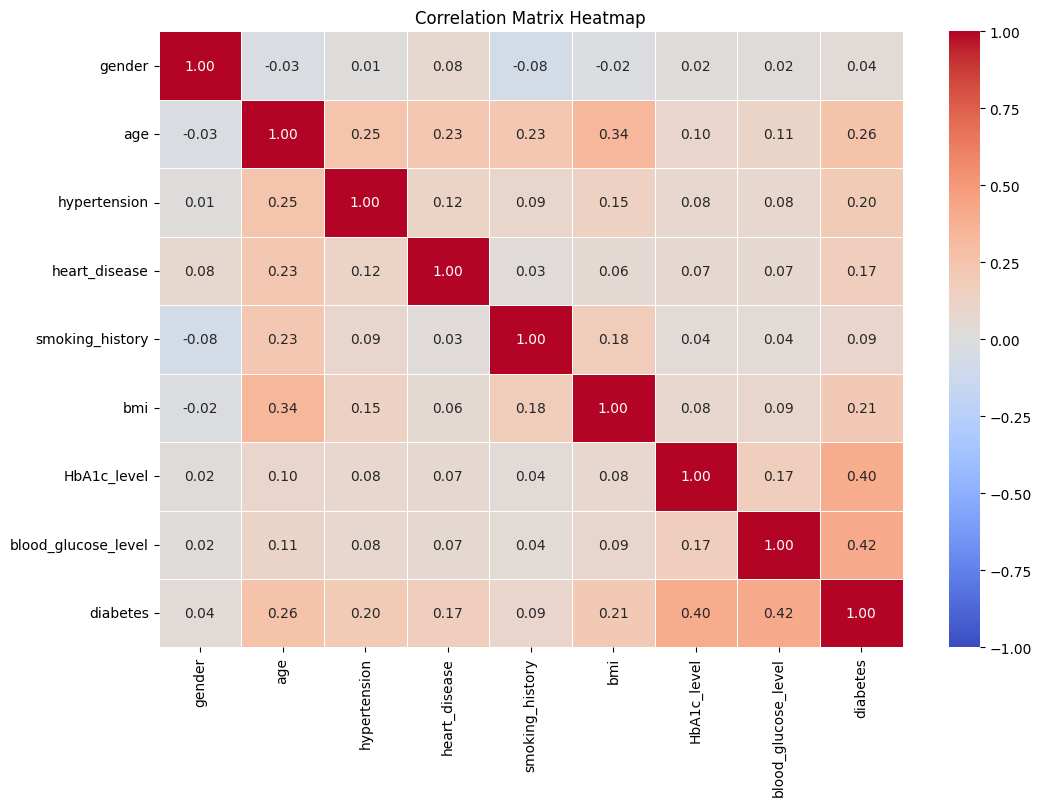

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Print numerical correlation values
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=.5,
            vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Optional: Save correlation matrix to CSV
correlation_matrix.to_csv('correlation_matrix.csv')

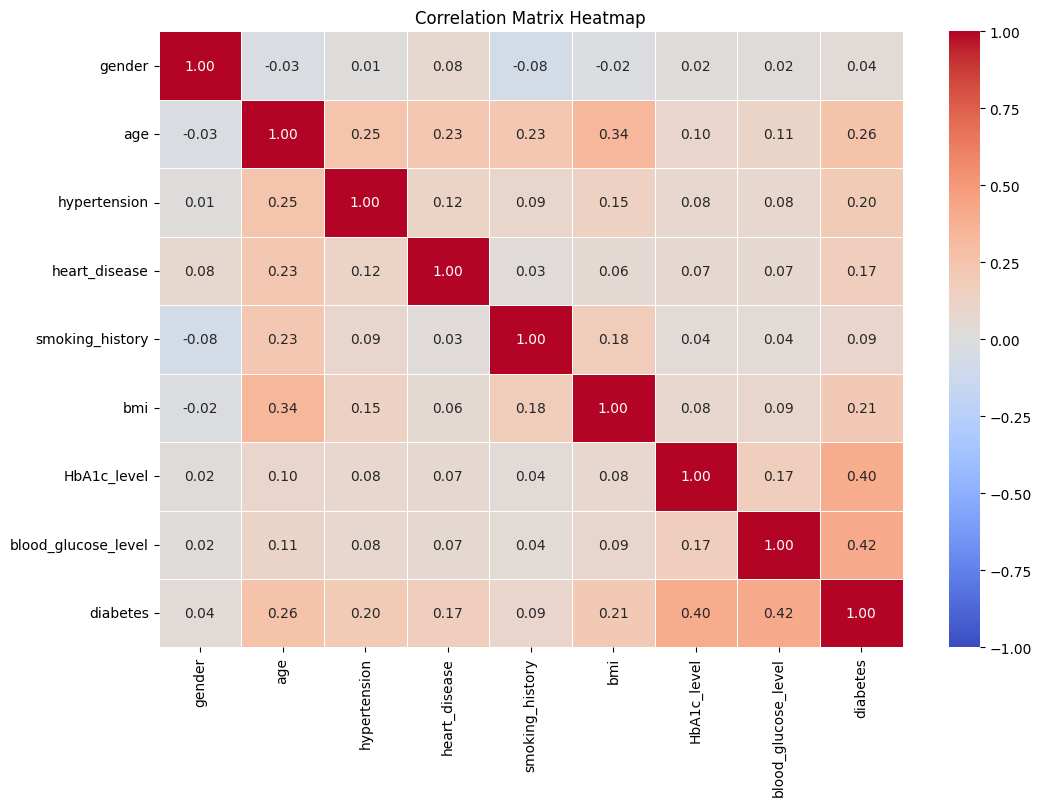

In [38]:
# Create a heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=.5,
            vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Optional: Save correlation matrix to CSV
correlation_matrix.to_csv('correlation_matrix.csv')

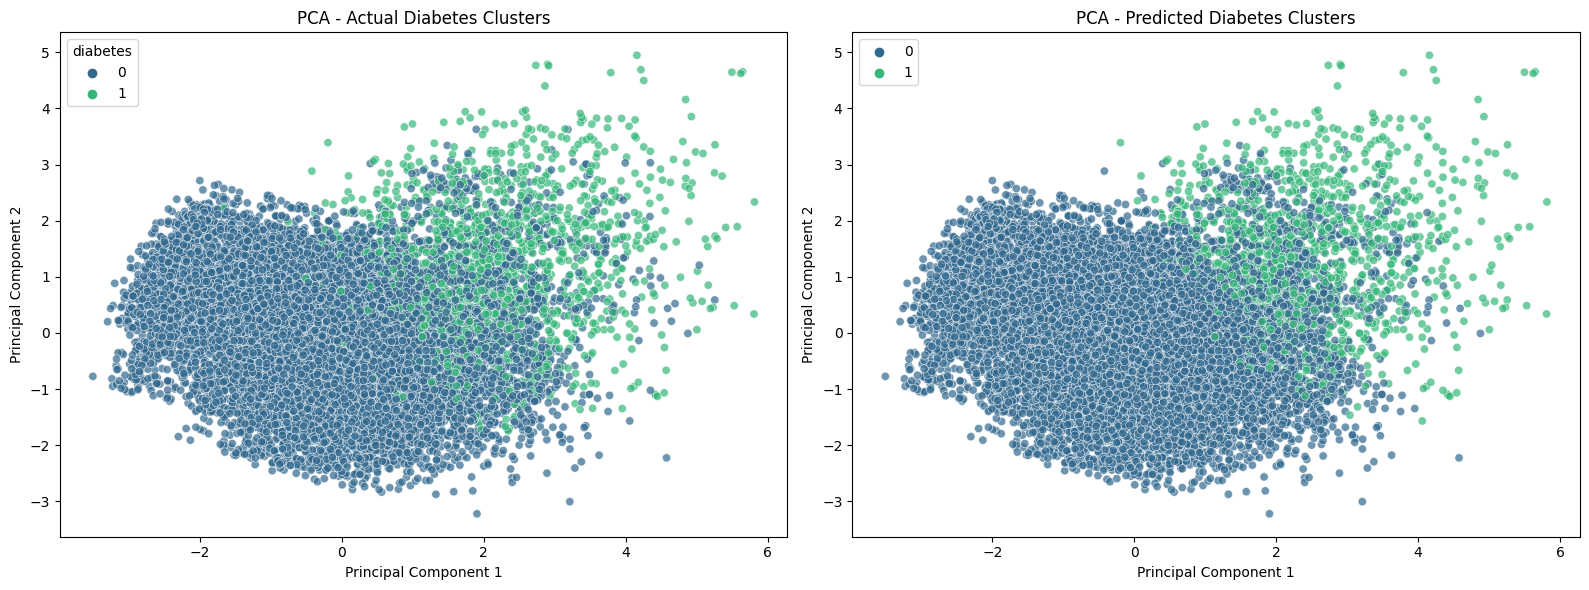

<Figure size 800x600 with 0 Axes>

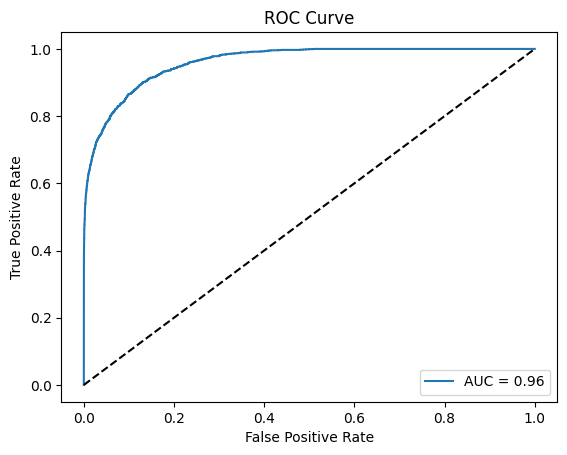

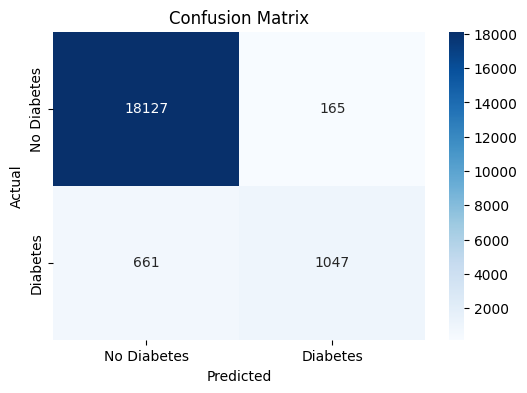

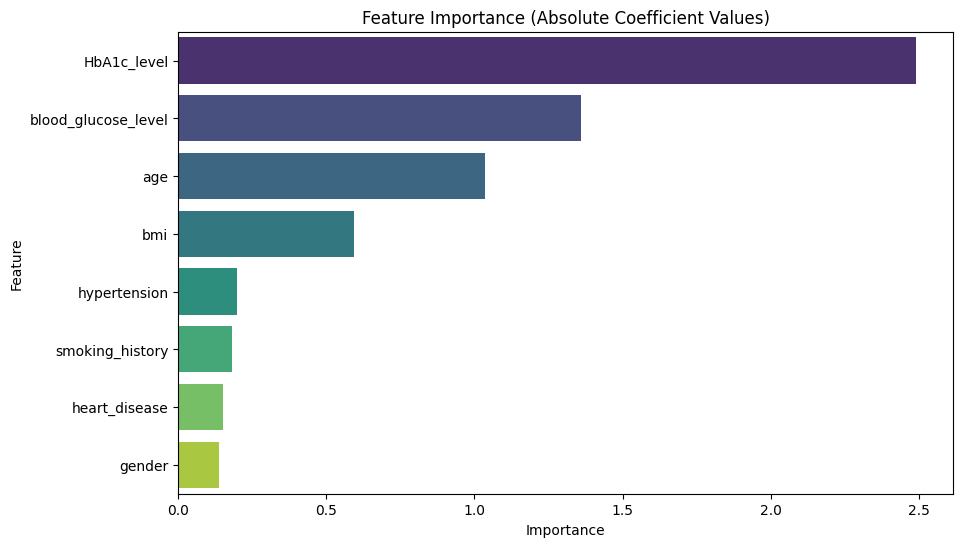

Text(0.5, 1.0, 'Actual Class Distribution')

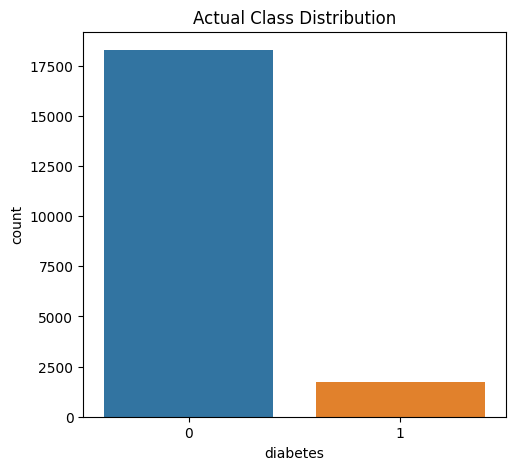

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# 1. PCA Visualization of Clusters (True vs Predicted)
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(16, 6))

# True labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, 
                palette='viridis', alpha=0.7)
plt.title('PCA - Actual Diabetes Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Predicted labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, 
                palette='viridis', alpha=0.7)
plt.title('PCA - Predicted Diabetes Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# 2. ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.show()

# 3. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 4. Feature Importance Plot (for Logistic Regression)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.show()

# 5. Class Distribution Comparison
plt.figure(figsize=(12, 5))

# Actual distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_test)
plt.title('Actual Class Distribution')

# # Predicted distribution
# plt.subplot(1, 2, 2)
# sns.countplot(x=y_pred)
# plt.title('Predicted Class Distribution')

# plt.tight_layout()
# plt.show()

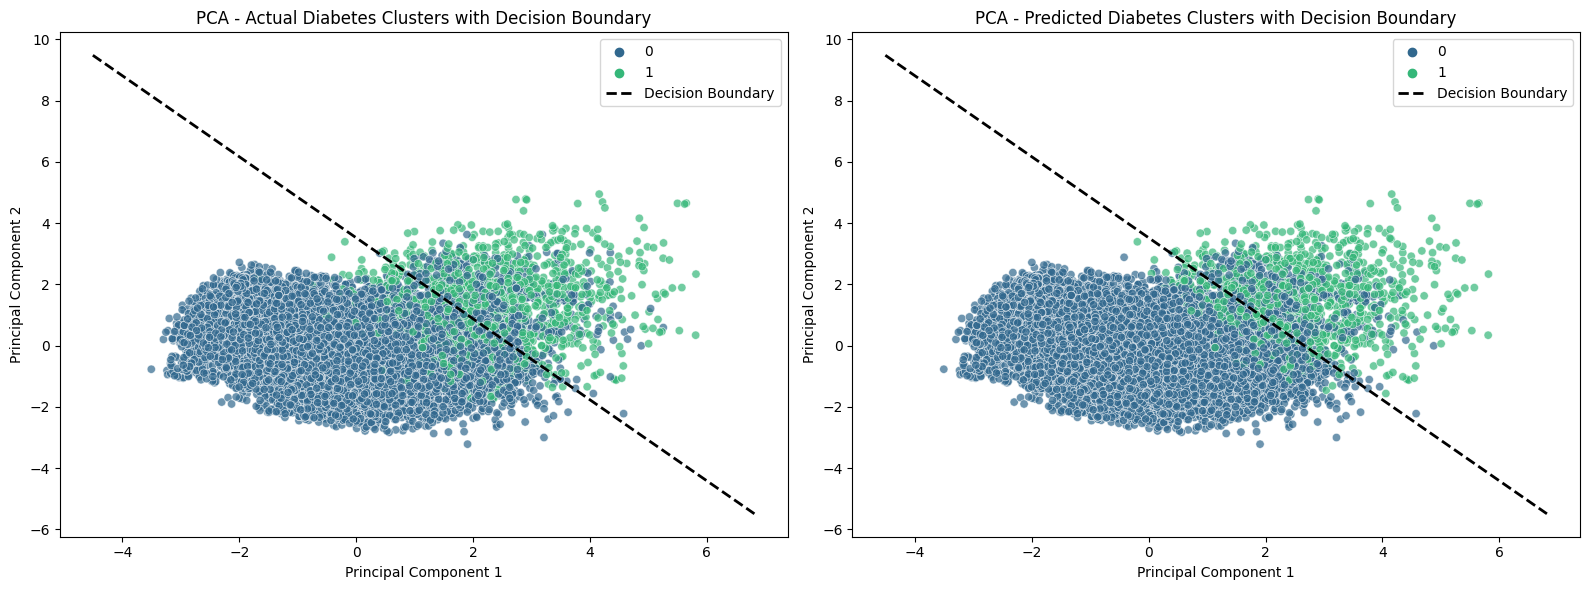

In [42]:
# Modified PCA Visualization with Decision Boundary
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Calculate decision boundary
w = model.coef_[0]  # Model coefficients
b = model.intercept_[0]  # Model intercept
W_pca = pca.components_  # PCA components (2 x n_features)

# Transform coefficients to PCA space
transformed_coef = W_pca @ w
pc1_min, pc1_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
pc1_values = np.linspace(pc1_min, pc1_max, 100)
pc2_values = (-transformed_coef[0] * pc1_values - b) / transformed_coef[1]

plt.figure(figsize=(16, 6))

# Actual labels with boundary
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, 
                palette='viridis', alpha=0.7)
plt.plot(pc1_values, pc2_values, 'k--', linewidth=2, label='Decision Boundary')
plt.title('PCA - Actual Diabetes Clusters with Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Predicted labels with boundary
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, 
                palette='viridis', alpha=0.7)
plt.plot(pc1_values, pc2_values, 'k--', linewidth=2, label='Decision Boundary')
plt.title('PCA - Predicted Diabetes Clusters with Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()